# Import Data From dataset



## Configuring the package import

In [1]:
import sys
sys.path.append("..")  # Add parent directory to path


### Importing The Filtered Dataset

In [2]:

from datasets import load_dataset, validate_dataset, show_datasets  # Now you can import the package


ds = load_dataset("./../data/categorized_v4_numeric.csv")
ds = validate_dataset(ds)

ds.head()


,Q1A,Q1E,Q2A,Q2E,Q3A,Q3E,Q4A,Q4E,Q5A,Q5E,...,gender,age,religion,married,familysize,major_category,depression_score,anxiety_score,stress_score,das_score
0,4,3890,4,2122,2,1944,4,2044,4,2153,...,2,16,12,1,2,0,41,48,54,86
1,4,8118,1,2890,2,4777,3,3090,4,5078,...,2,16,7,1,4,0,38,31,41,66
2,3,5784,1,4373,4,3242,1,6470,4,3927,...,2,17,4,1,3,0,53,26,31,66
3,2,5081,3,6837,2,5521,1,4556,3,3269,...,2,13,4,1,5,6,30,31,30,55
4,2,3215,2,7731,3,4156,4,2802,4,5628,...,2,19,10,1,4,8,46,54,43,86


## Removing unnecessary columns

In [3]:
ds = ds.drop(columns=["country"]) # Country column is not numeric and is irrelevents

ds.head()

,Q1A,Q1E,Q2A,Q2E,Q3A,Q3E,Q4A,Q4E,Q5A,Q5E,...,gender,age,religion,married,familysize,major_category,depression_score,anxiety_score,stress_score,das_score
0,4,3890,4,2122,2,1944,4,2044,4,2153,...,2,16,12,1,2,0,41,48,54,86
1,4,8118,1,2890,2,4777,3,3090,4,5078,...,2,16,7,1,4,0,38,31,41,66
2,3,5784,1,4373,4,3242,1,6470,4,3927,...,2,17,4,1,3,0,53,26,31,66
3,2,5081,3,6837,2,5521,1,4556,3,3269,...,2,13,4,1,5,6,30,31,30,55
4,2,3215,2,7731,3,4156,4,2802,4,5628,...,2,19,10,1,4,8,46,54,43,86


### Preprocessing the data

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd


# Define targets
target_columns = ["depression_score", "anxiety_score", "stress_score", "das_score"]

sc = MinMaxScaler()
# Separate features and targets
X = sc.fit_transform(ds.drop(columns=target_columns))
y = ds[target_columns]

# Option 1: Keep only numeric features
# X = X.select_dtypes(include=["number"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Convert X to a pandas DataFrame
X = pd.DataFrame(X, columns=ds.drop(columns=target_columns).columns)

# Display the first 5 rows of X_test
X.head()
# print(y[:5])  # Uncomment this line if you want to display the first 5 rows of y


,Q1A,Q1E,Q2A,Q2E,Q3A,Q3E,Q4A,Q4E,Q5A,Q5E,...,TIPI9,TIPI10,education,urban,gender,age,religion,married,familysize,major_category
0,1.000000,0.000307,1.000000,0.000901,0.333333,0.000446,1.000000,0.000197,1.000000,0.000209,...,0.142857,0.142857,0.50,1.000000,0.666667,0.001511,1.000000,0.333333,0.015038,0.000000
1,1.000000,0.000656,0.000000,0.001256,0.333333,0.000545,0.666667,0.000307,1.000000,0.000518,...,0.142857,0.714286,0.50,1.000000,0.666667,0.001511,0.583333,0.333333,0.030075,0.000000
2,0.666667,0.000463,0.000000,0.001942,1.000000,0.000492,0.000000,0.000663,1.000000,0.000396,...,0.428571,0.285714,0.50,1.000000,0.666667,0.002015,0.333333,0.333333,0.022556,0.000000
3,0.333333,0.000405,0.666667,0.003083,0.333333,0.000571,0.000000,0.000462,0.666667,0.000326,...,0.857143,0.142857,0.25,1.000000,0.666667,0.000000,0.333333,0.333333,0.037594,0.545455
4,0.333333,0.000251,0.333333,0.003496,0.666667,0.000524,1.000000,0.000277,1.000000,0.000576,...,0.428571,0.428571,0.75,0.666667,0.666667,0.003023,0.833333,0.333333,0.030075,0.727273


### Building & Training the model

In [5]:

# Train the model (no need for MultiOutputClassifier)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



### Evaluating the model

In [6]:
for i, target in enumerate(target_columns):
    print(f"\nResults for {target}:")
    print(
        f"Mean Absolute Error: {mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])}"
    )
    print(f"R² Score: {r2_score(y_test.iloc[:, i], y_pred[:, i])}")



Results for depression_score:
Mean Absolute Error: 1.9158214959145192
R² Score: 0.9585493244710521

Results for anxiety_score:
Mean Absolute Error: 2.1727730986800755
R² Score: 0.9270275462239146

Results for stress_score:
Mean Absolute Error: 2.127737272155877
R² Score: 0.9317328326844403

Results for das_score:
Mean Absolute Error: 2.0918529226901317
R² Score: 0.9774226425894639


## Graphs

### Prediction vs Actual

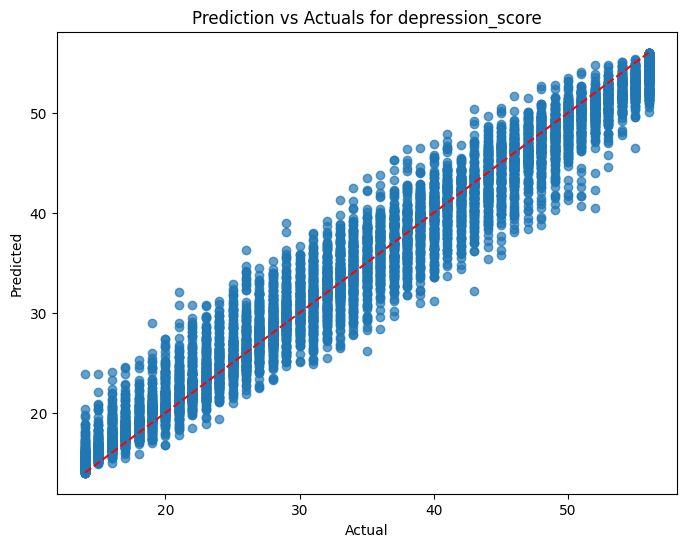

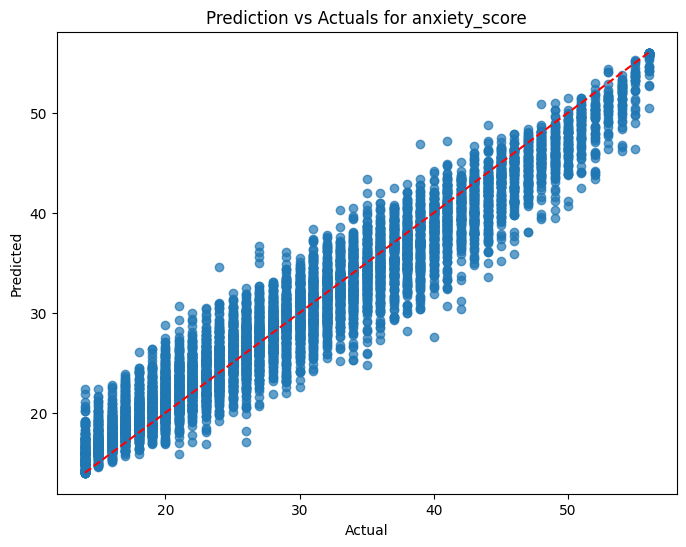

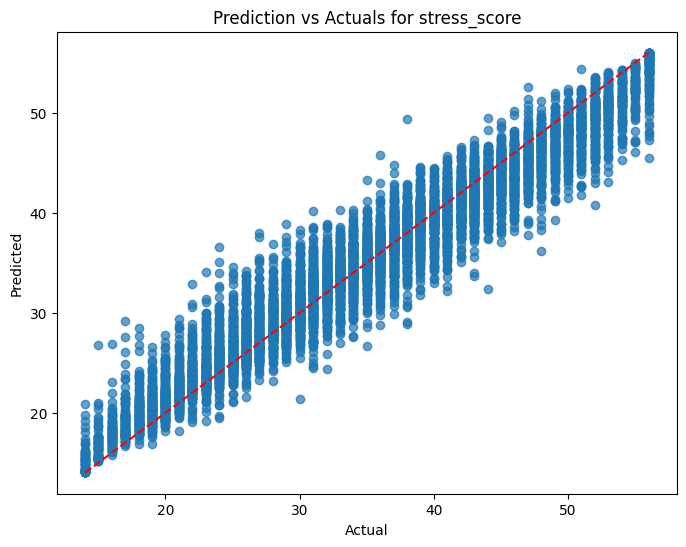

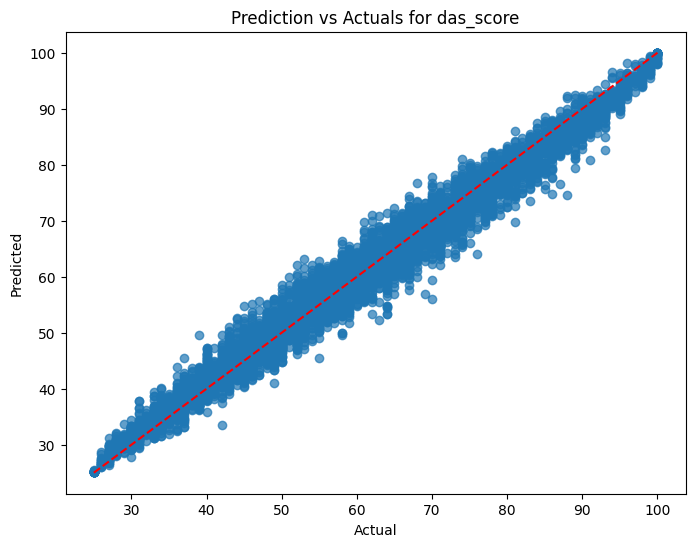

In [7]:
import matplotlib.pyplot as plt

# Plot: Prediction vs Actual
for i, target in enumerate(target_columns):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.7)
    plt.plot(
        [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
        [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
        color="red",
        linestyle="--",
    )  # Line of perfect prediction
    plt.title(f"Prediction vs Actuals for {target}")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()


### Residual Plot

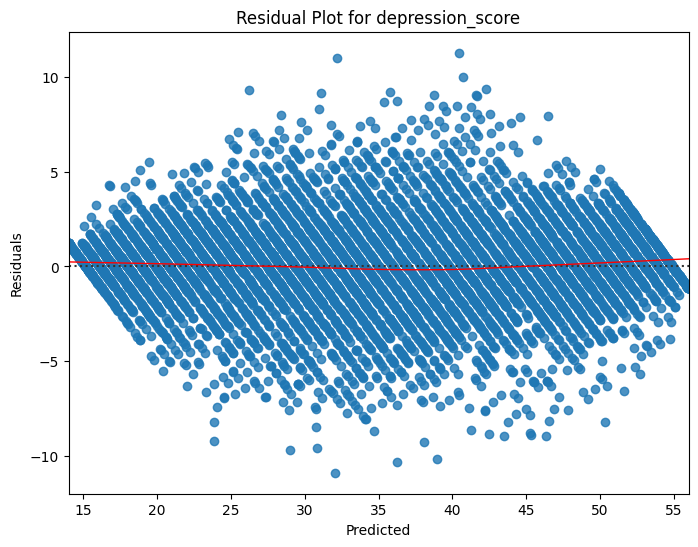

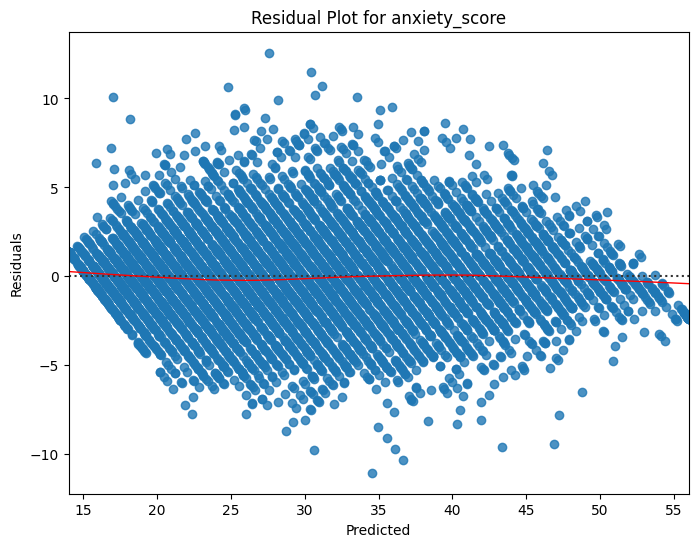

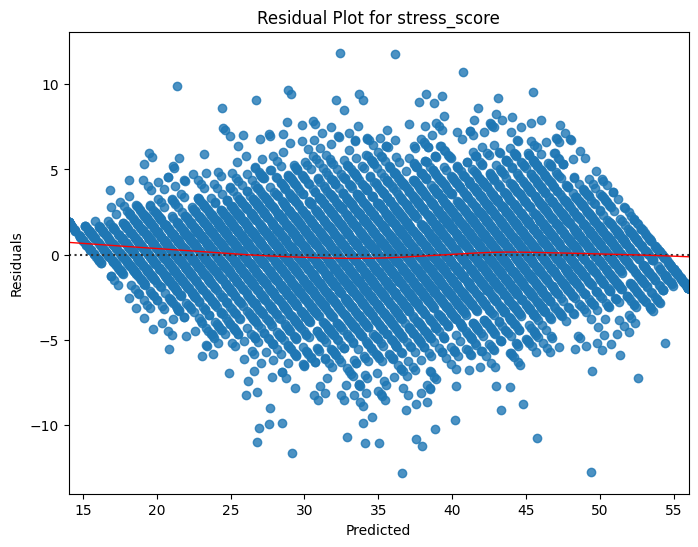

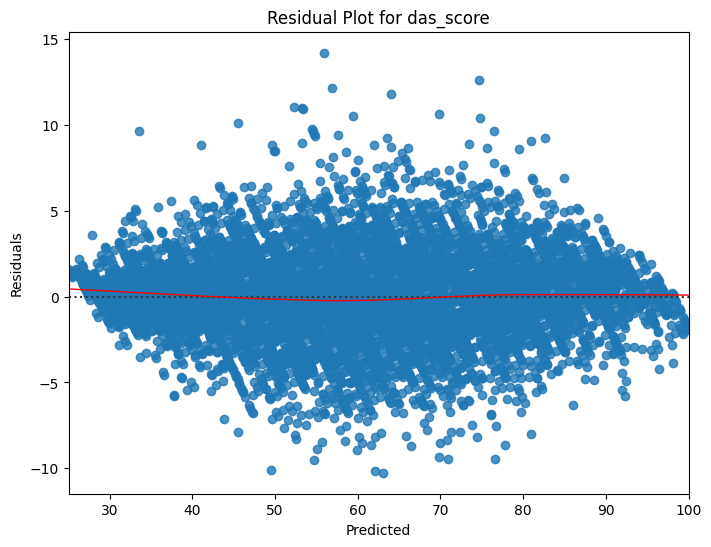

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Residual Plot
for i, target in enumerate(target_columns):
    # Calculate residuals
    residuals = y_test.iloc[:, i] - y_pred[:, i]

    # Create a residual plot
    plt.figure(figsize=(8, 6))
    sns.residplot(
        x=y_pred[:, i], y=residuals, lowess=True, line_kws={"color": "red", "lw": 1}
    )
    plt.title(f"Residual Plot for {target}")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.show()


## Saving the model

In [9]:
import joblib

# Save the trained model
joblib.dump(model, "models/rfv3.pkl")

# Save the feature column names used during training
joblib.dump(X.columns.tolist(), "models/rfv3_features.pkl")

print("✅ Model and features saved to the 'Models' folder.")


✅ Model and features saved to the 'Models' folder.
